In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('../net_weights/metrics.csv')
runs = ["resnet34_fine_0_mae_loss", "resnet34_fine_3_rmse_loss", "resenet34_2"]
colors = ['red', 'blue', 'green']

In [25]:
df.columns

Index(['Unnamed: 0', 'idx', 'step', 'value', 'epoch', 'time', 'run.hash',
       'run.dataloader.batch_size', 'run.dataloader.color_jitter',
       'run.dataloader.num_workers', 'run.dataloader.save_processed_dataset',
       'run.dataloader.skip', 'run.dataloader.step', 'run.environment.epochs',
       'run.environment.experiment_name', 'run.environment.run_name',
       'run.environment.seed', 'run.loss.beta', 'run.loss.gamma',
       'run.loss.learn_beta', 'run.loss.learn_gamma', 'run.loss.type',
       'run.model.dropout_rate', 'run.model.feature_dimension',
       'run.model.name', 'run.optimizer.lr', 'run.optimizer.momentum',
       'run.optimizer.name', 'run.paths.aim_dir', 'run.paths.images',
       'run.paths.net_weights_dir', 'run.paths.test_dataset',
       'run.paths.train_dataset', 'run.paths.validation_dataset',
       'run.scheduler.gamma', 'run.scheduler.name', 'run.scheduler.step_size',
       'metric.name', 'metric.context', 'metric.context.subset',
       'run.optimi

In [26]:
#df = df[df.run.str.contains("resnet34")]
df = df[
    (df['run.environment.run_name'] == "resnet34_fine_0_mae_loss")
    | (df['run.environment.run_name'] == "resnet34_fine_3_rmse_loss")
    | (df['run.environment.run_name'] == "resenet34_2")
]
df = df[['step', 'run.environment.run_name', 'value', 'metric.context.subset']]

In [27]:
values = {}

for run in runs:
    values[run] = {}
    for phase in ['train', 'validation']:
        v = df[(df['run.environment.run_name'] == run) & (df['metric.context.subset'] == phase)].value.values
        if np.isnan(v).any() or len(v) == 0:
            values[run][phase] = None
        else:
            values[run][phase] = v[:40]

In [28]:
values.keys()

values['resnet34_mae'] = values['resnet34_fine_0_mae_loss']
values['resnet34_rmse'] = values['resnet34_fine_3_rmse_loss']
values['resnet34_smoothedl1'] = values['resenet34_2']

del values['resnet34_fine_0_mae_loss']
del values['resnet34_fine_3_rmse_loss']
del values['resenet34_2']

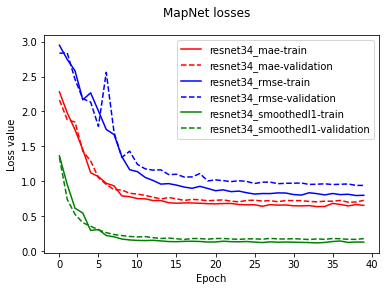

In [29]:
fig, ax = plt.subplots()
for color, (k, v) in zip(colors, values.items()):
    for phase in ['train', 'validation']:
        if v[phase] is not None:
            plt.plot(
                np.arange(len(v[phase])),
                v[phase],
                c=color,
                linestyle='dashed' if phase == 'validation' else 'solid',
                label=f"{k}-{phase}"
            )
ax.set_ylabel("Loss value")
ax.set_xlabel("Epoch")
ax.legend()
fig.suptitle("MapNet losses")
fig.savefig("../net_weights/posenet_losses.png", dpi=300)
plt.show()